In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

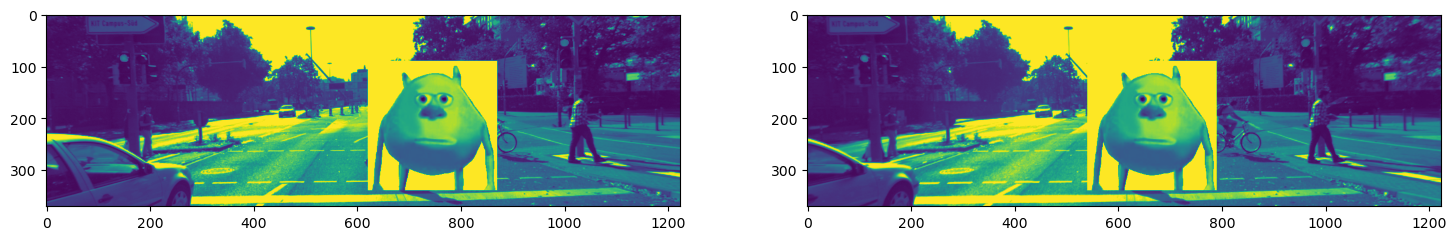

In [12]:
im_left = cv2.imread('../data/raw/final_project_2023_rect/seq_03/image_02/data/0000000005.png')
im_left = cv2.cvtColor(im_left, cv2.COLOR_BGR2GRAY)
im_right = cv2.imread('../data/raw/final_project_2023_rect/seq_03/image_03/data/0000000005.png')
im_right = cv2.cvtColor(im_right, cv2.COLOR_BGR2GRAY)

f, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(18,18))
ax_left.imshow(im_left)
ax_right.imshow(im_right)

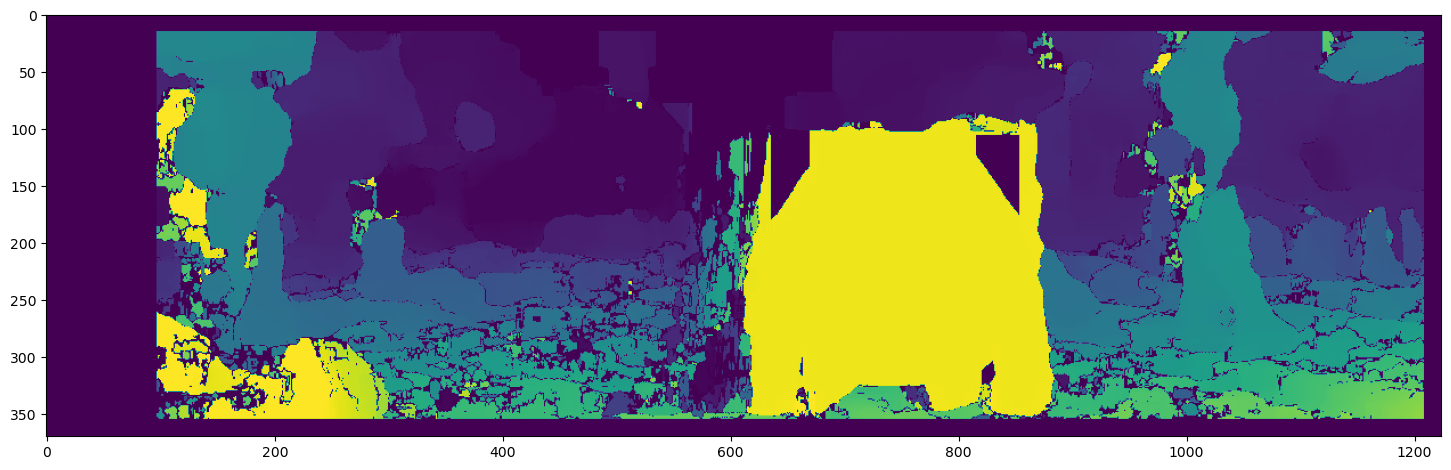

In [56]:
min_disp = 3
num_disp = 5 * 16
block_size = 31

stereo = cv2.StereoBM_create(numDisparities = num_disp, blockSize = block_size)
stereo.setMinDisparity(min_disp)
stereo.setDisp12MaxDiff(200)
stereo.setUniquenessRatio(1)
stereo.setSpeckleRange(3)
stereo.setSpeckleWindowSize(3)

disp = stereo.compute(im_left, im_right).astype(np.float32) / 16.0

plt.figure(figsize=(18,18))
plt.imshow(disp)

0.012195121951219513
0.02310969966664498
0.1146131755047041
0.030479092538224145


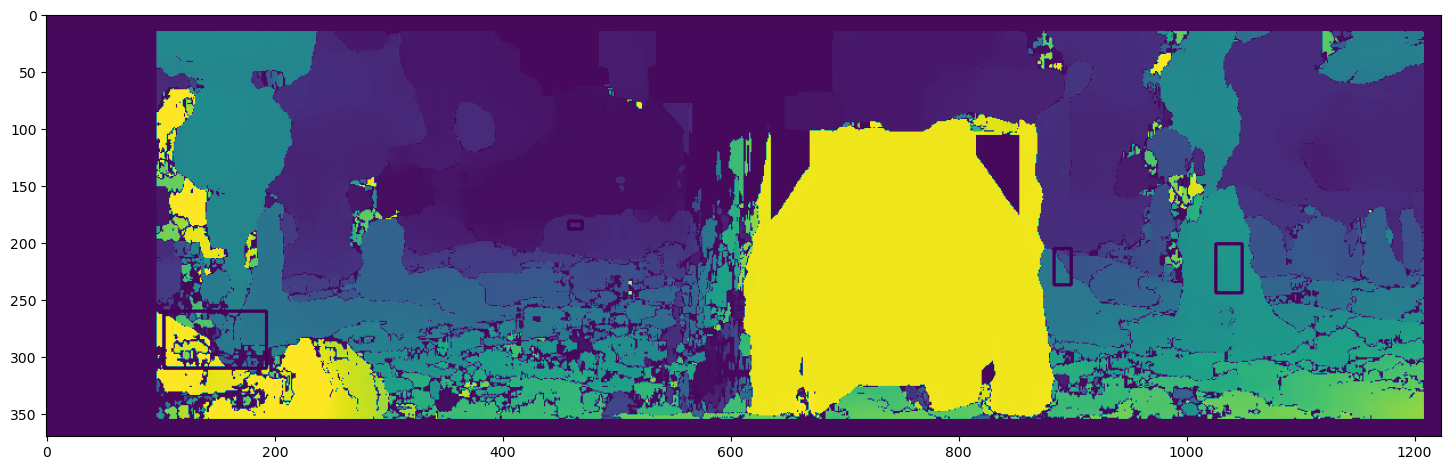

In [61]:
bboxes1 = np.array([[0,201.514206,297.433075,370],
                    [1000.916809,151.643967,1076.956909,295.646484],
                    [446.264679,172.997131,483.641022,198.633377],
                    [867.967407,167.970062,917.901123,276.058960]])
bboxes2 = np.array([[0,195.325424,233.257751,367.463257],
                    [958.674683,145.034378,1032.881836,297.623138],
                    [438.047150,173.084274,475.409637,199.053802],
                    [788.372253,153.427689,893.130249,277.143463]])


bbox_ratio = 0.3
n_points = 20

for bbox1,bbox2 in zip(bboxes1, bboxes2):
    
    x_min1 = int(bbox1[0])
    y_min1 = int(bbox1[1])
    x_max1 = int(bbox1[2])
    y_max1 = int(bbox1[3])
    #cv2.rectangle(disp, (x_min1, y_min1), (x_max1, y_max1), 0, 2)
    x_min_recalc = int( (x_min1+x_max1)/2 - (x_max1-x_min1)/2*bbox_ratio )
    x_max_recalc = int( (x_min1+x_max1)/2 + (x_max1-x_min1)/2*bbox_ratio )
    y_min_recalc = int( (y_min1+y_max1)/2 - (y_max1-y_min1)/2*bbox_ratio )
    y_max_recalc = int( (y_min1+y_max1)/2 + (y_max1-y_min1)/2*bbox_ratio )
    cv2.rectangle(disp, (x_min_recalc, y_min_recalc), (x_max_recalc, y_max_recalc), 0, 2)

    bbox_disp = disp[y_min_recalc:y_max_recalc, x_min_recalc:x_max_recalc]

    bbox_dist = bbox_disp.flatten()
    bbox_dist.sort()
    if(len(bbox_dist) > n_points): bbox_dist = bbox_dist[-n_points:]
    bbox_dist = 1 / bbox_dist.mean()

    print(bbox_dist)

plt.figure(figsize=(18,18))
plt.imshow(disp)